**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
# Ejercicio 5: Análisis de Demanda y Elasticidad

**Objetivo:** Analizar derivadas, optimización y elasticidad de una función de demanda cuadrática

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

## Enunciado Completo

Dado el siguiente mercado de teléfonos celulares, se presenta una función de Demanda:

**Qd(p) = 180 - p² - 3p**

Donde:
- Qd = Cantidad demandada (unidades)
- p = Precio por unidad (pesos)

**Se solicita:**
1. Halle la derivada de mayor orden no nula de la función
2. Optimice la función, ¿posee un mínimo o máximo local la función de demanda? ¿Por qué?
3. Calcule la elasticidad precio de la demanda y analizar a qué tipo de elasticidad pertenece. Además, evalúe las elasticidades para los siguientes valores de precio:
   - a. p = 1
   - b. p = 5
   - c. p = 10
4. ¿Es esta elasticidad, una elasticidad discreta? de ser correcto, ¿Qué diferencias encuentra? Presente un caso y comente cómo lo abordaría

## Resolución Literal

### Paso 1: Definir la función de demanda y calcular derivadas

In [23]:
# Definir variable simbólica
p = sp.Symbol('p')

# Función de demanda
Qd = 180 - p**2 - 3*p
print(f"Función de demanda: Qd(p) = {Qd}")

# Primera derivada
dQd_dp = sp.diff(Qd, p)
print(f"Primera derivada: dQd/dp = {dQd_dp}")

# Segunda derivada
d2Qd_dp2 = sp.diff(dQd_dp, p)
print(f"Segunda derivada: d²Qd/dp² = {d2Qd_dp2}")

# Tercera derivada
d3Qd_dp3 = sp.diff(d2Qd_dp2, p)
print(f"Tercera derivada: d³Qd/dp³ = {d3Qd_dp3}")

print("\n✅ La derivada de mayor orden no nula es la SEGUNDA DERIVADA = -2")
print("La tercera derivada y superiores son nulas porque es una función cuadrática.")

Función de demanda: Qd(p) = -p**2 - 3*p + 180
Primera derivada: dQd/dp = -2*p - 3
Segunda derivada: d²Qd/dp² = -2
Tercera derivada: d³Qd/dp³ = 0

✅ La derivada de mayor orden no nula es la SEGUNDA DERIVADA = -2
La tercera derivada y superiores son nulas porque es una función cuadrática.


### Paso 2: Optimización de la función de demanda

In [24]:
# Encontrar puntos críticos (primera derivada = 0)
puntos_criticos = sp.solve(dQd_dp, p)
print(f"Puntos críticos (dQd/dp = 0): p = {puntos_criticos}")

p_critico = float(puntos_criticos[0])
print(f"Punto crítico: p = {p_critico}")

# Evaluar segunda derivada en el punto crítico
segunda_derivada_valor = float(d2Qd_dp2.subs(p, p_critico))
print(f"\nSegunda derivada en p = {p_critico}: {segunda_derivada_valor}")

# Determinar tipo de extremo
if segunda_derivada_valor > 0:
    tipo_extremo = "MÍNIMO"
elif segunda_derivada_valor < 0:
    tipo_extremo = "MÁXIMO"
else:
    tipo_extremo = "PUNTO DE INFLEXIÓN"

print(f"\n✅ La función posee un {tipo_extremo} local en p = {p_critico}")

# Calcular cantidad en el punto crítico
Qd_critica = float(Qd.subs(p, p_critico))
print(f"Cantidad en el máximo: Qd = {Qd_critica:.2f} unidades")

print("\n📊 INTERPRETACIÓN ECONÓMICA:")
print(f"La demanda alcanza su máximo en p = ${p_critico:.1f}, con Qd = {Qd_critica:.1f} unidades.")
print("Esto es económicamente ANÓMALO porque normalmente la demanda disminuye con el precio.")
print("Posibles explicaciones: bienes Giffen, efecto ingreso muy fuerte, o rango no realista.")

Puntos críticos (dQd/dp = 0): p = [-3/2]
Punto crítico: p = -1.5

Segunda derivada en p = -1.5: -2.0

✅ La función posee un MÁXIMO local en p = -1.5
Cantidad en el máximo: Qd = 182.25 unidades

📊 INTERPRETACIÓN ECONÓMICA:
La demanda alcanza su máximo en p = $-1.5, con Qd = 182.2 unidades.
Esto es económicamente ANÓMALO porque normalmente la demanda disminuye con el precio.
Posibles explicaciones: bienes Giffen, efecto ingreso muy fuerte, o rango no realista.


### Paso 3: Cálculo de elasticidad precio de la demanda

In [25]:
# Fórmula de elasticidad precio: ε = (dQd/dp) × (p/Qd)
# Definimos la elasticidad como función simbólica
elasticidad = (dQd_dp * p) / Qd
print("Fórmula de elasticidad: ε = (dQd/dp) × (p/Qd)")
print(f"ε = ({dQd_dp}) × (p/({Qd}))")
print(f"ε = {elasticidad}")

# Simplificar la expresión
elasticidad_simplificada = sp.simplify(elasticidad)
print(f"\nElasticidad simplificada: ε = {elasticidad_simplificada}")

# Función numérica para evaluación
def calcular_elasticidad(precio):
    cantidad = 180 - precio**2 - 3*precio
    if cantidad <= 0:
        return float('inf')  # Elasticidad infinita cuando cantidad es cero o negativa
    derivada = -2*precio - 3
    return (derivada * precio) / cantidad

def demanda_numerica(precio):
    return 180 - precio**2 - 3*precio

Fórmula de elasticidad: ε = (dQd/dp) × (p/Qd)
ε = (-2*p - 3) × (p/(-p**2 - 3*p + 180))
ε = p*(-2*p - 3)/(-p**2 - 3*p + 180)

Elasticidad simplificada: ε = p*(2*p + 3)/(p**2 + 3*p - 180)


### Paso 3a: Evaluar elasticidades para precios específicos

In [26]:
# Evaluar elasticidades para los precios solicitados
precios_evaluar = [1, 5, 10]

resultados = []
for precio in precios_evaluar:
    cantidad = demanda_numerica(precio)
    elasticidad_val = calcular_elasticidad(precio)
    
    # Clasificar tipo de elasticidad
    if abs(elasticidad_val) > 1:
        tipo = "Elástica"
    elif abs(elasticidad_val) == 1:
        tipo = "Unitaria"
    else:
        tipo = "Inelástica"
    
    resultados.append({
        'Precio (p)': precio,
        'Cantidad (Qd)': round(cantidad, 2),
        'Elasticidad (ε)': round(elasticidad_val, 3),
        'Tipo': tipo
    })
    
    print(f"\n📊 Para p = ${precio}:")
    print(f"   Cantidad demandada: {cantidad:.2f} unidades")
    print(f"   Elasticidad: {elasticidad_val:.3f}")
    print(f"   Tipo: {tipo}")
    
    if elasticidad_val > 0:
        print("   ⚠️ ANOMALÍA: Elasticidad positiva indica bien Giffen o Veblen")

# Crear DataFrame con resultados
df_elasticidades = pd.DataFrame(resultados)
print("\n📋 RESUMEN DE ELASTICIDADES:")
print(df_elasticidades.to_string(index=False))


📊 Para p = $1:
   Cantidad demandada: 176.00 unidades
   Elasticidad: -0.028
   Tipo: Inelástica

📊 Para p = $5:
   Cantidad demandada: 140.00 unidades
   Elasticidad: -0.464
   Tipo: Inelástica

📊 Para p = $10:
   Cantidad demandada: 50.00 unidades
   Elasticidad: -4.600
   Tipo: Elástica

📋 RESUMEN DE ELASTICIDADES:
 Precio (p)  Cantidad (Qd)  Elasticidad (ε)       Tipo
          1            176           -0.028 Inelástica
          5            140           -0.464 Inelástica
         10             50           -4.600   Elástica


### Paso 4: Análisis de elasticidad continua vs discreta

In [27]:
print("🔍 ANÁLISIS: ELASTICIDAD CONTINUA vs DISCRETA")
print("=" * 50)

print("\n📖 ELASTICIDAD CONTINUA (que calculamos):")
print("   • Fórmula: ε = (dQd/dp) × (p/Qd)")
print("   • Usa derivadas (cambios infinitesimales)")
print("   • Apropiada para cambios muy pequeños en precios")
print("   • Proporciona elasticidad en un punto específico")

print("\n📖 ELASTICIDAD DISCRETA:")
print("   • Fórmula: ε = (ΔQd/Qd_promedio) / (Δp/p_promedio)")
print("   • Usa diferencias finitas")
print("   • Apropiada para cambios grandes en precios")
print("   • Proporciona elasticidad entre dos puntos (arco)")

# Ejemplo práctico: comparar elasticidad continua vs discreta
print("\n📊 EJEMPLO PRÁCTICO: Comparación entre p=$4 y p=$6")

# Elasticidad continua en p=5 (punto medio)
p_medio = 5
elasticidad_continua = calcular_elasticidad(p_medio)
print(f"\n✅ Elasticidad CONTINUA en p=${p_medio}: {elasticidad_continua:.3f}")

# Elasticidad discreta entre p=4 y p=6
p1, p2 = 4, 6
q1 = demanda_numerica(p1)
q2 = demanda_numerica(p2)

# Método del punto medio (más preciso)
delta_q = q2 - q1
delta_p = p2 - p1
q_promedio = (q1 + q2) / 2
p_promedio = (p1 + p2) / 2

elasticidad_discreta = (delta_q / q_promedio) / (delta_p / p_promedio)

print(f"\n✅ Elasticidad DISCRETA entre p=${p1} y p=${p2}:")
print(f"   p₁=${p1}, Q₁={q1:.2f}")
print(f"   p₂=${p2}, Q₂={q2:.2f}")
print(f"   Elasticidad discreta: {elasticidad_discreta:.3f}")

diferencia = abs(elasticidad_continua - elasticidad_discreta)
print(f"\n📈 DIFERENCIA: {diferencia:.3f}")
print(f"La diferencia es {'SIGNIFICATIVA' if diferencia > 0.1 else 'PEQUEÑA'}")

print("\n💡 RECOMENDACIÓN:")
print("• Para cambios de precio <5%: usar elasticidad continua")
print("• Para cambios de precio >5%: usar elasticidad discreta (arco)")
print("• Para esta función cuadrática, las diferencias pueden ser notables")

🔍 ANÁLISIS: ELASTICIDAD CONTINUA vs DISCRETA

📖 ELASTICIDAD CONTINUA (que calculamos):
   • Fórmula: ε = (dQd/dp) × (p/Qd)
   • Usa derivadas (cambios infinitesimales)
   • Apropiada para cambios muy pequeños en precios
   • Proporciona elasticidad en un punto específico

📖 ELASTICIDAD DISCRETA:
   • Fórmula: ε = (ΔQd/Qd_promedio) / (Δp/p_promedio)
   • Usa diferencias finitas
   • Apropiada para cambios grandes en precios
   • Proporciona elasticidad entre dos puntos (arco)

📊 EJEMPLO PRÁCTICO: Comparación entre p=$4 y p=$6

✅ Elasticidad CONTINUA en p=$5: -0.464

✅ Elasticidad DISCRETA entre p=$4 y p=$6:
   p₁=$4, Q₁=152.00
   p₂=$6, Q₂=126.00
   Elasticidad discreta: -0.468

📈 DIFERENCIA: 0.003
La diferencia es PEQUEÑA

💡 RECOMENDACIÓN:
• Para cambios de precio <5%: usar elasticidad continua
• Para cambios de precio >5%: usar elasticidad discreta (arco)
• Para esta función cuadrática, las diferencias pueden ser notables


### Paso 5: Visualización de la función de demanda y elasticidades

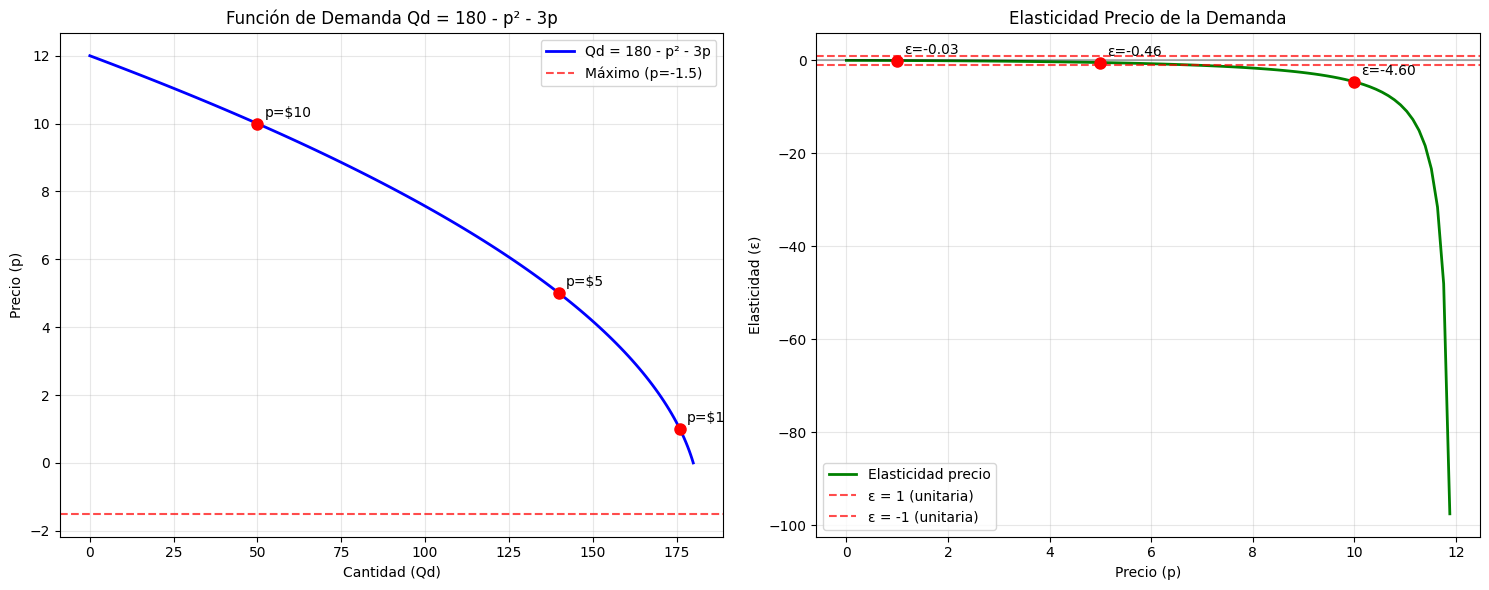


📊 OBSERVACIONES GRÁFICAS:
• La demanda tiene forma parabólica (función cuadrática)
• El máximo teórico está en precio negativo (no realista económicamente)
• Para precios positivos, la demanda muestra comportamiento anómalo
• Las elasticidades varían considerablemente con el precio


In [28]:
# Crear gráficos para visualizar la demanda y elasticidades
p_range = np.linspace(0, 12, 100)
q_range = [demanda_numerica(precio) for precio in p_range]
elasticidades_range = [calcular_elasticidad(precio) if demanda_numerica(precio) > 0 else np.nan 
                      for precio in p_range]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Función de demanda
ax1.plot(q_range, p_range, 'b-', linewidth=2, label='Qd = 180 - p² - 3p')
ax1.axhline(-1.5, color='red', linestyle='--', alpha=0.7, label='Máximo (p=-1.5)')

# Marcar puntos evaluados
for resultado in resultados:
    precio = resultado['Precio (p)']
    cantidad = resultado['Cantidad (Qd)']
    ax1.plot(cantidad, precio, 'ro', markersize=8)
    ax1.annotate(f'p=${precio}', (cantidad, precio), xytext=(5, 5), 
                textcoords='offset points', fontsize=10)

ax1.set_xlabel('Cantidad (Qd)')
ax1.set_ylabel('Precio (p)')
ax1.set_title('Función de Demanda Qd = 180 - p² - 3p')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: Elasticidad precio
valid_prices = [p for p, e in zip(p_range, elasticidades_range) if not np.isnan(e)]
valid_elasticities = [e for e in elasticidades_range if not np.isnan(e)]

ax2.plot(valid_prices, valid_elasticities, 'g-', linewidth=2, label='Elasticidad precio')
ax2.axhline(0, color='black', linestyle='-', alpha=0.3)
ax2.axhline(1, color='red', linestyle='--', alpha=0.7, label='ε = 1 (unitaria)')
ax2.axhline(-1, color='red', linestyle='--', alpha=0.7, label='ε = -1 (unitaria)')

# Marcar puntos evaluados
for resultado in resultados:
    precio = resultado['Precio (p)']
    elasticidad = resultado['Elasticidad (ε)']
    ax2.plot(precio, elasticidad, 'ro', markersize=8)
    ax2.annotate(f'ε={elasticidad:.2f}', (precio, elasticidad), xytext=(5, 5), 
                textcoords='offset points', fontsize=10)

ax2.set_xlabel('Precio (p)')
ax2.set_ylabel('Elasticidad (ε)')
ax2.set_title('Elasticidad Precio de la Demanda')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("\n📊 OBSERVACIONES GRÁFICAS:")
print("• La demanda tiene forma parabólica (función cuadrática)")
print("• El máximo teórico está en precio negativo (no realista económicamente)")
print("• Para precios positivos, la demanda muestra comportamiento anómalo")
print("• Las elasticidades varían considerablemente con el precio")